In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [ ]:
text_width = 5.50107 # in 
dpi = 300

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  #  figure titles

matplotlib.rc("font", size=fs)  # controls default text sizes
matplotlib.rc("axes", titlesize=fs)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=fs)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=fs_m1)  # legend fontsize
matplotlib.rc(
    "figure", titlesize=fs_p1, dpi=dpi, autolayout=False
)  # fontsize of the figure
matplotlib.rc("lines", linewidth=1, markersize=3)
matplotlib.rc("grid", alpha=0.3)
matplotlib.rc("axes", grid=True)

matplotlib.rc("font", **{"family": "serif", "serif": ["Palatino"]})
matplotlib.rc("text", usetex=True)

In [2]:
api = wandb.Api()
entity, project = # set to your entity and project 

### MNIST Plot

In [3]:
sweep_names = [
    "vae_sweep_015_25k_0",
    "vae_sweep_015_25k_1",
    "vae_sweep_015_25k_2",
    "vae_sweep_015_37k5_0",
    "vae_sweep_015_37k5_1",
    "vae_sweep_015_37k5_2",
    "vae_sweep_015_50k_0",
    "vae_sweep_015_50k_1",
    "vae_sweep_015_50k_2",
    "vae_sweep_090_25k_0",
    "vae_sweep_090_25k_1",
    "vae_sweep_090_25k_2",
    "vae_sweep_090_37k5_0",
    "vae_sweep_090_37k5_1",
    "vae_sweep_090_37k5_2",
    "vae_sweep_090_50k_0",
    "vae_sweep_090_50k_1",
    "vae_sweep_090_50k_2",
    "vae_sweep_180_25k_0",
    "vae_sweep_180_25k_1",
    "vae_sweep_180_25k_2",
    "vae_sweep_180_37k5_0",
    "vae_sweep_180_37k5_1",
    "vae_sweep_180_37k5_2",
    "vae_sweep_180_50k_0",
    "vae_sweep_180_50k_1",
    "vae_sweep_180_50k_2",
    "augvae_sweep_015_25k_0",
    "augvae_sweep_015_25k_1",
    "augvae_sweep_015_25k_2",
    "augvae_sweep_015_37k5_0",
    "augvae_sweep_015_37k5_1",
    "augvae_sweep_015_37k5_2",
    "augvae_sweep_015_50k_0",
    "augvae_sweep_015_50k_1",
    "augvae_sweep_015_50k_2",
    "augvae_sweep_090_25k_0",
    "augvae_sweep_090_25k_1",
    "augvae_sweep_090_25k_2",
    "augvae_sweep_090_37k5_0",
    "augvae_sweep_090_37k5_1",
    "augvae_sweep_090_37k5_2",
    "augvae_sweep_090_50k_0",
    "augvae_sweep_090_50k_1",
    "augvae_sweep_090_50k_2",
    "augvae_sweep_180_25k_0",
    "augvae_sweep_180_25k_1",
    "augvae_sweep_180_25k_2",
    "augvae_sweep_180_37k5_0",
    "augvae_sweep_180_37k5_1",
    "augvae_sweep_180_37k5_2",
    "augvae_sweep_180_50k_0",
    "augvae_sweep_180_50k_1",
    "augvae_sweep_180_50k_2",
    "invvae_sweep_015_25k_0",
    "invvae_sweep_015_25k_1",
    "invvae_sweep_015_25k_2",
    "invvae_sweep_015_37k5_0",
    "invvae_sweep_015_37k5_1",
    "invvae_sweep_015_37k5_2",
    "invvae_sweep_015_50k_0",
    "invvae_sweep_015_50k_1",
    "invvae_sweep_015_50k_2",
    "invvae_sweep_090_25k_0",
    "invvae_sweep_090_25k_1",
    "invvae_sweep_090_25k_2",
    "invvae_sweep_090_37k5_0",
    "invvae_sweep_090_37k5_1",
    "invvae_sweep_090_37k5_2",
    "invvae_sweep_090_50k_0",
    "invvae_sweep_090_50k_1",
    "invvae_sweep_090_50k_2",
    "invvae_sweep_180_25k_0",
    "invvae_sweep_180_25k_1",
    "invvae_sweep_180_25k_2",
    "invvae_sweep_180_37k5_0",
    "invvae_sweep_180_37k5_1",
    "invvae_sweep_180_37k5_2",
    "invvae_sweep_180_50k_0",
    "invvae_sweep_180_50k_1",
    "invvae_sweep_180_50k_2",
    #
    "vae_sweep_015_12k5_0",
    "vae_sweep_015_12k5_1",
    "vae_sweep_015_12k5_2",
    "vae_sweep_090_12k5_0",
    "vae_sweep_090_12k5_1",
    "vae_sweep_090_12k5_2",
    "vae_sweep_180_12k5_0",
    "vae_sweep_180_12k5_1",
    "vae_sweep_180_12k5_2",
    "invvae_sweep_015_12k5_0",
    "invvae_sweep_015_12k5_1",
    "invvae_sweep_015_12k5_2",
    "invvae_sweep_090_12k5_0",
    "invvae_sweep_090_12k5_1",
    "invvae_sweep_090_12k5_2",
    "invvae_sweep_180_12k5_0",
    "invvae_sweep_180_12k5_1",
    "invvae_sweep_180_12k5_2",
    "augvae_sweep_015_12k5_0",
    "augvae_sweep_015_12k5_1",
    "augvae_sweep_015_12k5_2",
    "augvae_sweep_090_12k5_0",
    "augvae_sweep_090_12k5_1",
    "augvae_sweep_090_12k5_2",
    "augvae_sweep_180_12k5_0",
    "augvae_sweep_180_12k5_1",
    "augvae_sweep_180_12k5_2",
    #
    "vae_wsda_sweep_015_12k5_0",
    "vae_wsda_sweep_090_12k5_0",
    "vae_wsda_sweep_180_12k5_0",
    "vae_wsda_sweep_015_25k_0",
    "vae_wsda_sweep_090_25k_0",
    "vae_wsda_sweep_180_25k_0",
    "vae_wsda_sweep_015_37k5_0",
    "vae_wsda_sweep_090_37k5_0",
    "vae_wsda_sweep_180_37k5_0",
    "vae_wsda_sweep_015_50k_0",
    "vae_wsda_sweep_090_50k_0",
    "vae_wsda_sweep_180_50k_0",
    "vae_wsda_sweep_015_12k5_1",
    "vae_wsda_sweep_090_12k5_1",
    "vae_wsda_sweep_180_12k5_1",
    "vae_wsda_sweep_015_25k_1",
    "vae_wsda_sweep_090_25k_1",
    "vae_wsda_sweep_180_25k_1",
    "vae_wsda_sweep_015_37k5_1",
    "vae_wsda_sweep_090_37k5_1",
    "vae_wsda_sweep_180_37k5_1",
    "vae_wsda_sweep_015_50k_1",
    "vae_wsda_sweep_090_50k_1",
    "vae_wsda_sweep_180_50k_1",
    "vae_wsda_sweep_015_12k5_2",
    "vae_wsda_sweep_090_12k5_2",
    "vae_wsda_sweep_180_12k5_2",
    "vae_wsda_sweep_015_25k_2",
    "vae_wsda_sweep_090_25k_2",
    "vae_wsda_sweep_180_25k_2",
    "vae_wsda_sweep_015_37k5_2",
    "vae_wsda_sweep_090_37k5_2",
    "vae_wsda_sweep_180_37k5_2",
    "vae_wsda_sweep_015_50k_2",
    "vae_wsda_sweep_090_50k_2",
    "vae_wsda_sweep_180_50k_2",
]

In [ ]:
sweep_id_dict = {}
for sweep in api.project(project).sweeps():
    if sweep.name in sweep_names:
            sweep_id_dict[sweep.name] = sweep.id

In [ ]:
summary_list, config_list, name_list, tags, ids, states, sweeps, sweep_ids = [], [], [], [], [], [],  [], []

for sweep, sweep_id in sweep_id_dict.items():
    runs = api.sweep(entity + "/" + project + "/" + sweep_id).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

        sweep_ids.append(sweep_id)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    "sweep_id": sweep_ids,
    })

In [ ]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

In [ ]:
# take only completed runs 
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# replace nans in config.num_trn and config.angle with -1
df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)

In [11]:
df_filtered['config.num_trn'].unique()

array([12500., 25000., 50000., 37500.])

In [12]:
df_filtered['config.dataset'].unique()

array(['MNIST'], dtype=object)

In [13]:
df_filtered['config.model_name'].unique()

array(['VAE_WSDA', 'InvVAE', 'VAE', 'AugVAE'], dtype=object)

In [16]:
df_filtered[df_filtered['config.model_name'] == 'InvVAE'].sort_values(
    by='summary.valid/elbo', ascending=False).groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed',])[
    [
        'summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'
    ]].first()

summary.test/elbo  \
config.angle config.num_trn config.model_name config.seed                      
0.0          12500.0        InvVAE            0.0                 488.687622   
                                              1.0                 480.197327   
                                              2.0                 475.893066   
             25000.0        InvVAE            0.0                1308.851318   
                                              1.0                1310.728394   
                                              2.0                1290.395996   
             37500.0        InvVAE            0.0                1375.890625   
                                              1.0                1338.634033   
                                              2.0                1309.537598   
             50000.0        InvVAE            0.0                1383.074707   
                                              1.0                1385.022705   
                                              2.0                1393.594971   
15.0         12500.0        InvVAE            0.0                 496.776062   
                                              1.0                 539.734131   
                                              2.0                 530.033936   
             25000.0        InvVAE            0.0                1739.654297   
                                              1.0                1770.303833   
                                              2.0                1695.435059   
             37500.0        InvVAE            0.0                1766.488892   
                                              1.0                1770.460449   
                                              2.0                1759.235718   
             50000.0        InvVAE            0.0                1800.786743   
                                              1.0                1782.231689   
                                              2.0                1779.032471   
90.0         12500.0        InvVAE            0.0                 502.762909   
                                              1.0                 539.585999   
                                              2.0                 496.038635   
             25000.0        InvVAE            0.0                1721.524048   
                                              1.0                1718.563843   
                                              2.0                1705.477661   
             37500.0        InvVAE            0.0                1769.814941   
                                              1.0                1761.995239   
                                              2.0                1723.109741   
             50000.0        InvVAE            0.0                1804.494141   
                                              1.0                1810.747681   
                                              2.0                1827.054688   
180.0        12500.0        InvVAE            0.0                 525.527649   
                                              1.0                 516.170959   
                                              2.0                 516.529785   
             25000.0        InvVAE            0.0                1707.880127   
                                              1.0                1746.252441   
                                              2.0                1741.811279   
             37500.0        InvVAE            0.0                1786.582642   
                                              1.0                1780.818237   
                                              2.0                1814.429688   
             50000.0        InvVAE            0.0                1791.314941   
                                              1.0                1853.387939   
                                              2.0                1794.561279   

                                                          

In [17]:
df = df_filtered.sort_values(
    by='summary.valid/elbo', ascending=False).groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',])[
    ['summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb']].first()
df

summary.test/elbo  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                      
0.0          12500.0        AugVAE            0.0         20                             1133.543701   
                                              1.0         20                             1131.833008   
                                              2.0         20                             1149.792480   
                            InvVAE            0.0         20                              488.687622   
                                              1.0         20                              480.197327   
...                                                                                              ...   
180.0        50000.0        VAE               2.0         16                              990.129150   
                                                          20                             1043.622803   
                            VAE_WSDA          0.0         20                             1010.315735   
                                              1.0         20                             1007.859863   
                                              2.0         20                             1011.851318   

                                                                                   summary.test/ll  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                    
0.0          12500.0        AugVAE            0.0         20                           1194.192505   
                                              1.0         20                           1192.952515   
                                              2.0         20                           1211.202026   
                            InvVAE            0.0         20                            547.648804   
                                              1.0         20                            538.557190   
...                                                                                            ...   
180.0        50000.0        VAE               2.0         16                           1044.540527   
                                                          20                           1108.865112   
                            VAE_WSDA          0.0         20                           1071.130005   
                                              1.0         20                           1068.451904   
                                              2.0         20                           1072.976196   

                                                                                   summary.test/x_mse  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                       
0.0          12500.0        AugVAE            0.0         20                                 0.024033   
                                              1.0         20                                 0.023216   
                                              2.0         20                                 0.022086   
                            InvVAE            0.0         20                                 0.022473   
                                              1.0         20                                 0.032619   
...                                                                                               ...   
180.0        50000.0        VAE               2.0         16                                 0.043612   
                                                          20                                 0.020963   
                            VAE_WSDA          0.0         20                                 0.019029   
                                              1.0         20                                 0.018684   
                                              2.0         20                                 0.018876   

                                     

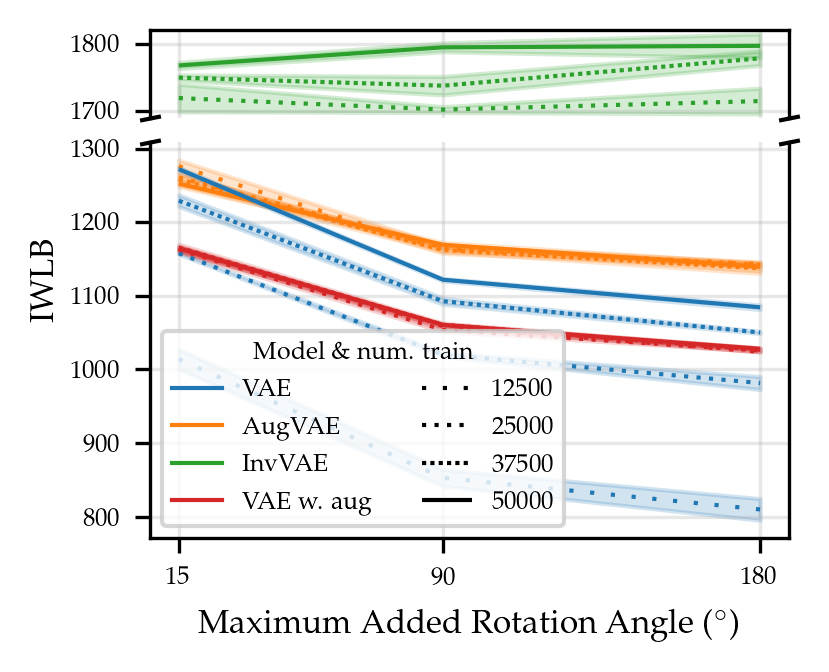

In [39]:
fig = plt.figure(figsize=(text_width * 0.5, text_width * 0.4), layout='none')
gs = fig.add_gridspec(
    2, 1, 
    wspace=0.35, hspace=0.1,
    height_ratios=[1, 4.5],
)
ax1a = fig.add_subplot(gs[0, 0])
ax1b = fig.add_subplot(gs[1, 0], sharex=ax1a)

tmp_df = df.reset_index()
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. train'})

colors = {
    'VAE': 'tab:blue',
    'AugVAE': 'tab:orange',
    'InvVAE': 'tab:green',
    'VAE_WSDA': 'tab:red',
}
markers = {
    12_500: 'X',
    25_000: 'X',
    37_500: 'X',
    50_000: 'X',
}
dashes = {
    12_500: (1, 4),
    25_000: (1, 2),
    37_500: (1, 1),
    50_000: (1, 0),
}

g1 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] == 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1a,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

g2 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] != 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1b,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)         

# only show x-ticks for the values in the data frame
ax1a.set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax1a.set_xlabel(None)
ax1b.set_xlabel('Maximum Added Rotation Angle ($^\circ$)')

ax1a.set_ylabel(None)
ax1b.set_ylabel(None)
fig.text(0., 0.5, "IWLB", ha="center", va="center", rotation=90)

# hide the spines between 1a and 1b
ax1a.spines.bottom.set_visible(False)
ax1b.spines.top.set_visible(False)
ax1a.xaxis.tick_top()
ax1a.tick_params(labeltop=False)  # don't put tick labels at the top
ax1b.xaxis.tick_bottom()

# remove the ticks markers for the top plot, but also don't put them on top
ax1a.tick_params(axis='x', which='both', length=0)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.
d = .2  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=5,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1a.plot([0, 1], [0, 0], transform=ax1a.transAxes, **kwargs)
ax1b.plot([0, 1], [1, 1], transform=ax1b.transAxes, **kwargs)

# manually add the legend(s)
ax1b.legend(
    handles=[matplotlib.lines.Line2D([0], [0], color=colors[model], linestyle='-', label=model if model != 'VAE_WSDA' else 'VAE w. aug') for model in colors.keys()] + [matplotlib.lines.Line2D([0], [0], color='black', dashes=dashes[num_trn], label=f'{num_trn}') for num_trn in dashes.keys()], 
    loc='lower left', ncol=2, title='Model \& num. train',
    title_fontsize=fs_m1,
)

plt.savefig('rotated_mnist_smol.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')

plt.show()

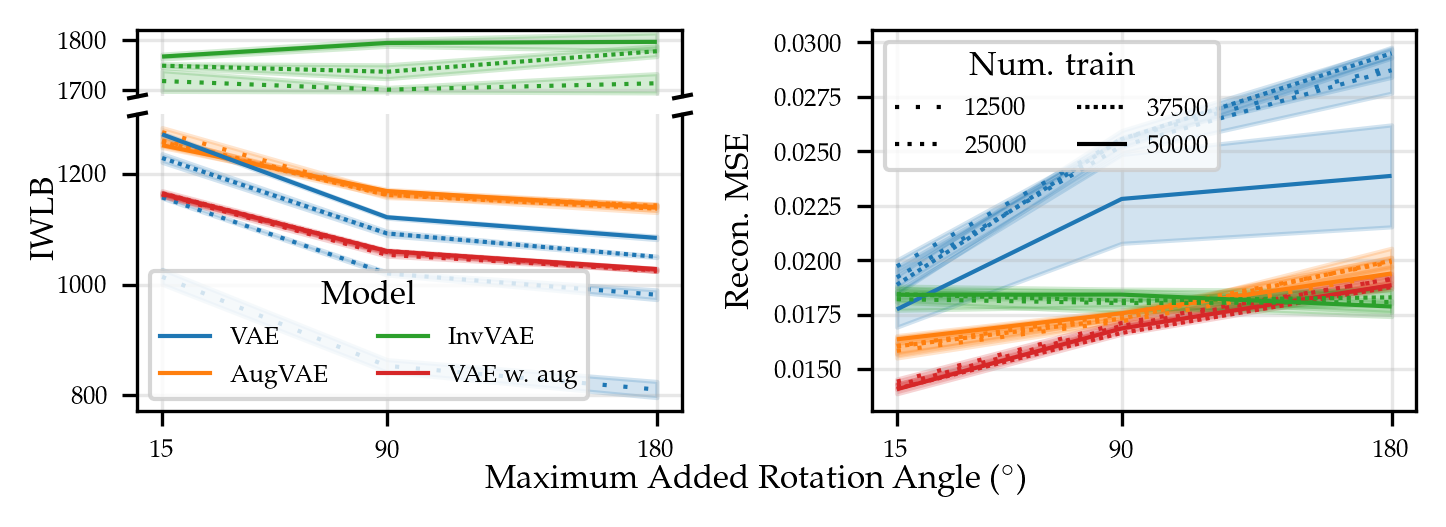

In [37]:
fig = plt.figure(figsize=(text_width, text_width * 0.3), layout='none')
gs = fig.add_gridspec(
    2, 2, 
    wspace=0.35, hspace=0.1,
    height_ratios=[1, 4.5], width_ratios=[1, 1],
)
ax1a = fig.add_subplot(gs[0, 0])
ax1b = fig.add_subplot(gs[1, 0], sharex=ax1a)
ax2 = fig.add_subplot(gs[:, 1], sharex=ax1a)

tmp_df = df.reset_index()

# rename the column config.model_name to Model and config.num_trn to N. train
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. train'})


colors = {
    'VAE': 'tab:blue',
    'AugVAE': 'tab:orange',
    'InvVAE': 'tab:green',
    'VAE_WSDA': 'tab:red',
}
markers = {
    12_500: 'X',
    25_000: 'X',
    37_500: 'X',
    50_000: 'X',
}
dashes = {
    12_500: (1, 4),
    25_000: (1, 2),
    37_500: (1, 1),
    50_000: (1, 0),
}

g1 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] == 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1a,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

g2 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] != 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1b,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df,
    x="config.angle",
    y="summary.test/x_mse",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax2,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

# only show x-ticks for the values in the data frame
ax1a.set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax1a.set_xlabel(None)
ax1b.set_xlabel(None)
ax2.set_xlabel('')
# add shared x sup label
fig.text(0.5, -0.03, 'Maximum Added Rotation Angle ($^\circ$)', ha='center', va='center')

ax1a.set_ylabel(None)
ax1b.set_ylabel(None)
fig.text(0.07, 0.5, "IWLB", ha="center", va="center", rotation=90)
ax2.set_ylabel('Recon. MSE')

# hide the spines between 1a and 1b
ax1a.spines.bottom.set_visible(False)
ax1b.spines.top.set_visible(False)
ax1a.xaxis.tick_top()
ax1a.tick_params(labeltop=False)  # don't put tick labels at the top
ax1b.xaxis.tick_bottom()

# remove the ticks markers for the top plot, but also don't put them on top
ax1a.tick_params(axis='x', which='both', length=0)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.
d = .2  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=5,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1a.plot([0, 1], [0, 0], transform=ax1a.transAxes, **kwargs)
ax1b.plot([0, 1], [1, 1], transform=ax1b.transAxes, **kwargs)

# manually add the legend(s)
# legend for model colors
ax1b.legend(
    handles=[matplotlib.lines.Line2D([0], [0], color=colors[model], linestyle='-', label=model if model != 'VAE_WSDA' else 'VAE w. aug') for model in colors.keys()], 
    loc='lower left', ncol=2, title='Model' 
)
# legend for training data line styles
ax2.legend(
    handles=[matplotlib.lines.Line2D([0], [0], color='black', dashes=dashes[num_trn], label=f'{num_trn}') for num_trn in dashes.keys()], 
    loc='upper left', ncol=2, title='Num. train'
)

plt.savefig('rotated_mnist.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')

plt.show()

### Galaxy MNIST result

In [11]:
run_ids = [
    '5desu2ep', # VAE 0 7k
    'ov6vtd16', # VAE 1 7k
    'jyqgv3f9', # VAE 2 7k
    '40c22h0a', # VAE 0 3k5
    '7z8xhk9l', # VAE 1 3k5
    'zirz5wfl', # VAE 2 3k5
    'uhfslr3b', # AugVAE 0 7k
    'e9oizq82', # AugVAE 1 7k
    '88zafbto', # AugVAE 2 7k
    'mytr9pcl', # AugVAE 0 3k5
    'sa9x2wsh', # AugVAE 1 3k5
    '8wl42y7m', # AugVAE 2 3k5
]


summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []

for run_id in run_ids: 
    run = api.run(entity + "/" + project + "/" + run_id)

    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

galaxy_runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    })


galaxy_runs_df = galaxy_runs_df.join(pd.json_normalize(galaxy_runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
galaxy_runs_df = galaxy_runs_df.join(pd.json_normalize(galaxy_runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

galaxy_runs_df = galaxy_runs_df[[
    'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',
    'summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'
]]

galaxy_runs_df

,config.num_trn,config.model_name,config.seed,config.model.latent_dim,summary.test/elbo,summary.test/ll,summary.test/x_mse,summary.test/iwlb
0,7000,VAE,0,20,10743.013672,10814.551758,0.009401,10950.567383
1,7000,VAE,1,20,11172.660156,11239.777344,0.009318,11363.404297
2,7000,VAE,2,20,10586.913086,10662.097656,0.009015,10818.731445
3,3500,VAE,0,20,8941.827148,9021.020508,0.010059,9201.563477
4,3500,VAE,1,20,8294.899414,8374.010742,0.010268,8555.270508
5,3500,VAE,2,20,10653.532227,10721.003906,0.009902,10865.968750
6,7000,AugVAE,0,20,12827.087891,12903.112305,0.006975,12932.594727
7,7000,AugVAE,1,20,12717.625977,12791.247070,0.007058,12818.574219
8,7000,AugVAE,2,20,12813.467773,12887.085938,0.007008,12914.560547
9,3500,AugVAE,0,20,12372.989258,12447.400391,0.007345,12492.141602


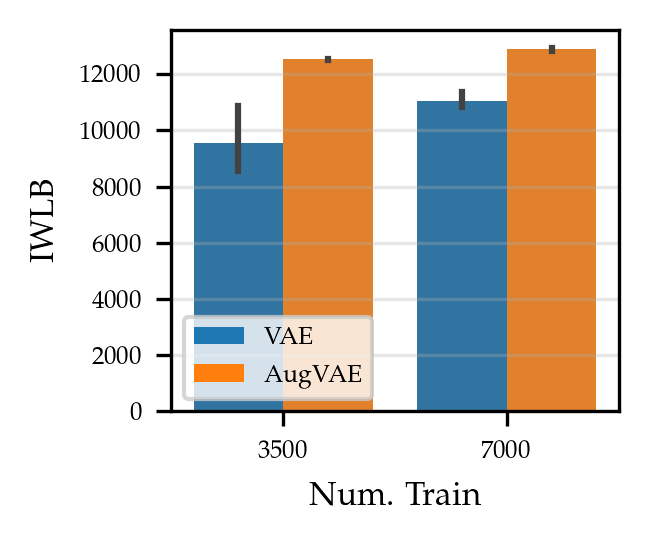

In [13]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(text_width * 0.35, text_width * 0.3),
    dpi=300
)

g = sns.barplot(data=galaxy_runs_df, x='config.num_trn', y='summary.test/iwlb', hue='config.model_name', ax=ax, legend=False)

# construct the legend manually
# legend for model colors, with blocks instead of lines to indicate color
ax.legend(
    handles=[matplotlib.patches.Patch(facecolor=colors[model], label=model) for model in ['VAE', 'AugVAE']],
    loc='lower left', ncol=1
)

# set the x-axis label
ax.set_xlabel('Num. Train')
# set the y-axis label
ax.set_ylabel('IWLB')

plt.savefig('galaxy_iwlb.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')

plt.show()

### Patch Camelyon result

In [14]:
run_ids = [
    'vv3ft967', # VAE 0 262k
    'vl80d104', # VAE 0 65k
    'i0o5psma', # VAE 0 16k
    'hhu7v3nw', # AugVAE 0 262k
    'dm2pyr3k', # AugVAE 0 65k
    '5q69vgi2', # AugVAE 0 16k
]

summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []

for run_id in run_ids: 
    run = api.run(entity + "/" + project + "/" + run_id)

    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

camelyon_runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    })


camelyon_runs_df = camelyon_runs_df.join(pd.json_normalize(camelyon_runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
camelyon_runs_df = camelyon_runs_df.join(pd.json_normalize(camelyon_runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

camelyon_runs_df = camelyon_runs_df[[
    'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',
    'summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'
]]

camelyon_runs_df

,config.num_trn,config.model_name,config.seed,config.model.latent_dim,summary.test/elbo,summary.test/ll,summary.test/x_mse,summary.test/iwlb
0,262144,VAE,0,20,-2691.060303,-2637.335449,0.091233,-2665.706787
1,65536,VAE,0,20,-2780.065918,-2726.063477,0.092568,-2751.068848
2,16384,VAE,0,20,-3409.392334,-3346.790283,0.100892,-3352.584229
3,262144,AugVAE,0,20,-3232.315918,-3163.398682,0.095161,-3211.384277
4,65536,AugVAE,0,20,-3316.857422,-3248.715088,0.095028,-3293.598145
5,16384,AugVAE,0,20,-3393.369385,-3324.037109,0.095093,-3369.726074


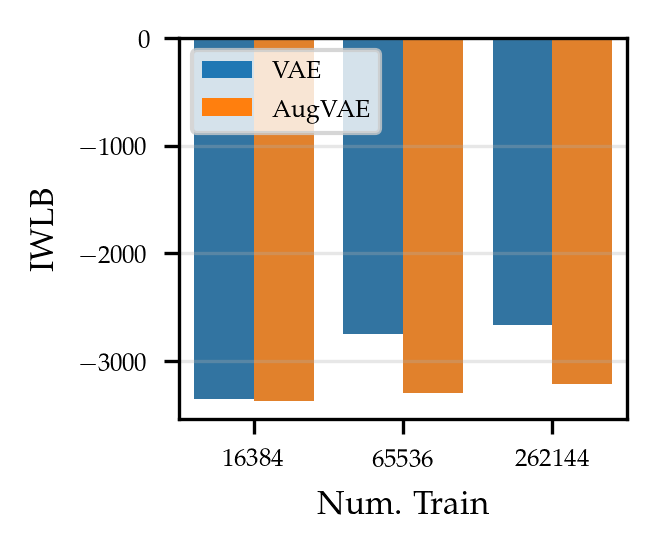

In [16]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(text_width * 0.35, text_width * 0.3),
    dpi=300
)

g = sns.barplot(data=camelyon_runs_df, x='config.num_trn', y='summary.test/iwlb', hue='config.model_name', ax=ax, legend=False)

# construct the legend manually
# legend for model colors, with blocks instead of lines to indicate color
ax.legend(
    handles=[matplotlib.patches.Patch(facecolor=colors[model], label=model) for model in ['VAE', 'AugVAE']],
    loc='upper left', ncol=1
)

# set the x-axis label
ax.set_xlabel('Num. Train')
# set the y-axis label
ax.set_ylabel('IWLB')

plt.savefig('camelyon_iwlb.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')

plt.show()